In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import IPython as ip
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
mpl.style.use('ggplot')
mpl.rc('figure', figsize=(7.2, 5.76))
mpl.rc('font', family='Noto Sans CJK TC')
plt.rc('lines', markeredgecolor='white', markeredgewidth=0.75)
plt.rc('patch', edgecolor='white', force_edgecolor=True, linewidth=1)
ip.display.set_matplotlib_formats('svg')

In [3]:
# shorthands: m, df
# ↑ means the variables should only use within a cell
# ↑ a good practice in the notebook programming
m = sm.datasets.anes96
df = m.load_pandas().data
df_raw = df

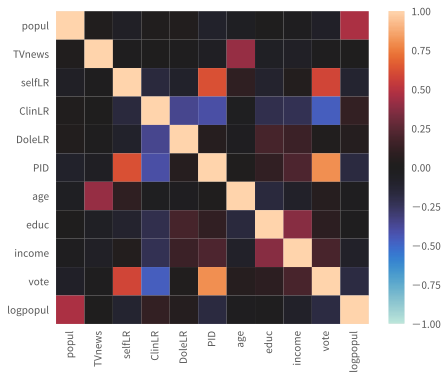

In [4]:
df = df_raw
df = df.corr()
sns.heatmap(df,
            vmin=-1, center=0, vmax=1,
            square=True)
df_corr = df

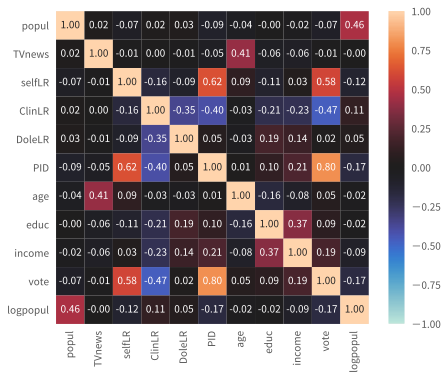

In [5]:
df = df_corr
sns.heatmap(df,
            vmin=-1, center=0, vmax=1,
            square=True, annot=True, fmt='.2f')

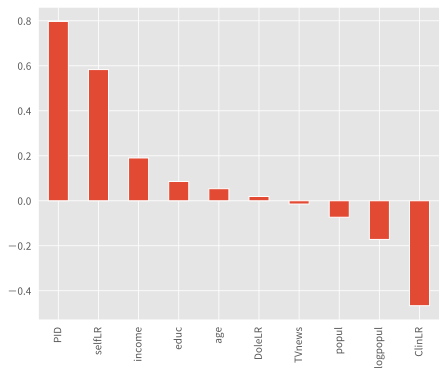

In [6]:
df = df_corr
s = df.vote
s = s.sort_values(ascending=False)
s = s.drop('vote')
s.plot.bar()

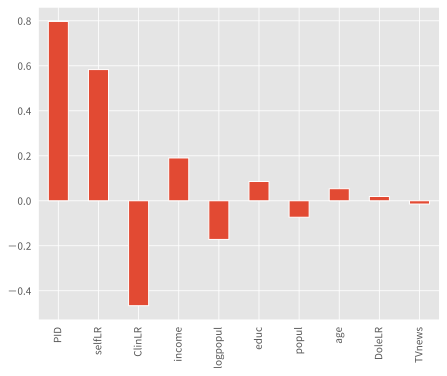

In [7]:
df = df_corr
df = df[['vote']]  # get df instead
df = df.assign(vote_abs=df.vote.abs())
df = df.sort_values('vote_abs', ascending=False)
df = df.drop('vote')
df.vote.plot.bar()

Try to plot in a graph form:

In [8]:
import networkx as nx

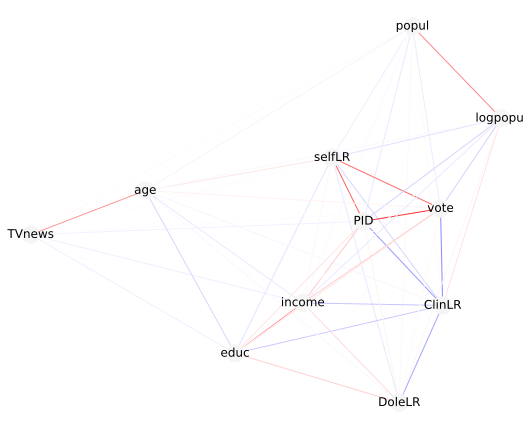

In [9]:
df_weight = (df_corr.mask(df_corr == 1, 0)
                    .abs())

G = nx.Graph()
G = nx.from_pandas_adjacency(df_weight)
nx.draw(G,
        pos=nx.spring_layout(G, seed=20200501),
        with_labels=True,
        node_color='whitesmoke',
        edge_color=[df_corr[u][v] for u, v in G.edges],
        edge_cmap=plt.cm.bwr, edge_vmin=-1, edge_vmax=1)